# Decision Trees


* Decision Trees builds classification or regression models in the form of tree structure
* It breaks down a dataset into smaller and smaller subsets while at the same time an associated tree is increamently developed
* The final result is a tree with decision nodes and leaf nodes
* Top most node is call root node

### Advantages 

* Decision trees can be used to predict both continuous and discrete values i.e. they work well for both regression and classification tasks.
* They require relatively less effort for training the algorithm.
* They can be used to classify non-linearly separable data.
* They're very fast and efficient compared to KNN and other classification algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('conversion_data.csv')

In [3]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [4]:
df.count()

country                316200
age                    316200
new_user               316200
source                 316200
total_pages_visited    316200
converted              316200
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.tree import DecisionTreeClassifier


dummification

In [7]:
df_new=pd.get_dummies(data=df)

In [8]:
df_new.columns

Index(['age', 'new_user', 'total_pages_visited', 'converted', 'country_China',
       'country_Germany', 'country_UK', 'country_US', 'source_Ads',
       'source_Direct', 'source_Seo'],
      dtype='object')

In [9]:
df_new.head(3)

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1


In [10]:
X=df_new.iloc[:,df_new.columns != 'converted']

In [11]:
y=df_new['converted']


## Train Test Split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=30)

In [13]:
X_train.shape

(221340, 10)

In [14]:
X_test.shape

(94860, 10)

In [15]:
y_train.shape

(221340,)

In [16]:
y_test.shape

(94860,)

## Build Decision Tree Classifier

In [17]:
c=DecisionTreeClassifier().fit(X_train,y_train)

## Accuracy of Decision Tree

In [18]:
#accuracy on Training dataset
c.score(X_train,y_train)

0.98827595554350778

In [19]:
#accuracy on test dataset
c.score(X_test,y_test)

0.9848829854522454

### Confusion Matrix

In [20]:
from sklearn.metrics import classification_report

In [21]:
#prediction on test data
y_preds = c.predict(X_test)

In [22]:
print(classification_report(y_test,y_preds))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     91885
          1       0.83      0.65      0.73      2975

avg / total       0.98      0.98      0.98     94860



In [23]:
from sklearn.metrics import roc_curve, auc

0.82452973048608902

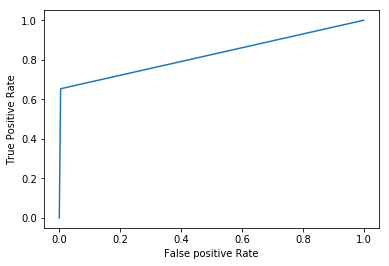

In [24]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)

#plot roc curve
plt.plot(false_positive_rate,true_positive_rate)
plt.xlabel("False positive Rate")
plt.ylabel("True Positive Rate")

roc_auc = auc(false_positive_rate, true_positive_rate)

roc_auc

## Hyper parameter tunning

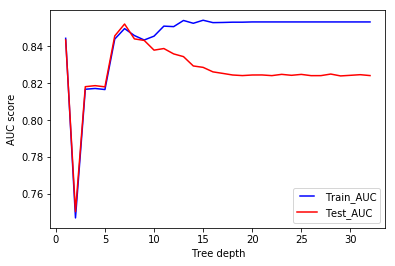

In [91]:
#create values between 1 and 32 ( min and max range of decision trees)
max_depths = np.linspace(1, 32, 32, endpoint=True)
#create empty vectors to contain model results for each of the max depth values
train_results = []
test_results = []
for max_depth in max_depths:
   # for each value of max length ,build and train  a decision tree classifier
   c = DecisionTreeClassifier(max_depth=max_depth)
   # for each value of max length ,fit the decision tree classifier on training dataset
   c.fit(X_train, y_train)
    # make predictions on training datatset
   train_pred = c.predict(X_train)
    #calculate fpr,tpr from training predictions
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    # calculate roc values for train dataset
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
    #predict on test data
   y_preds =c.predict(X_test)
   #calculate fpr,tpr from test predictions
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
   # calculate roc values for test dataset
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
    
    
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths,train_results,'b',label="Train_AUC")
line2, = plt.plot(max_depths, test_results,'r', label="Test_AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

So, we can chose max_depth as 7 or 8

In [68]:
c=DecisionTreeClassifier(max_depth=7).fit(X_train,y_train)
print(c.score(X_train,y_train))
print(c.score(X_test,y_test))

0.985953736333
0.986464263125


So, our test accuracy increased with adjusting the hyper parameter

In [69]:
#prediction on test data
y_preds = c.predict(X_test)
print(classification_report(y_test,y_preds))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99     91885
          1       0.83      0.71      0.77      2975

avg / total       0.99      0.99      0.99     94860



Our recall rate also increased from 63 % to 71%